In [1]:
!python inference.py

Build `srdensenet_x4` model successfully.
Load `srdensenet_x4` model weights `c:\Users\admin\OneDrive\Documents\GAN-API\GANS\gan-models\SRDenseNet\results\pretrained_models\SRDenseNet_x4-ImageNet-bb28c23d.pth.tar` successfully.
Execution time: 11.79 seconds
SR image save to `./output/img5_sr.jpeg`


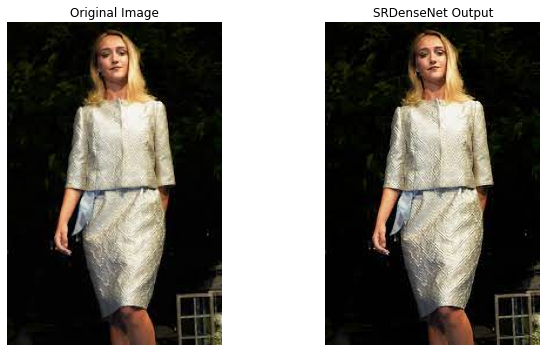

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folders containing the images
original_folder = 'figure/'
output_folder = 'output/'

# Get the list of image files in the original folder
original_images = os.listdir(original_folder)

# Get the list of image files in the output folder
output_images = os.listdir(output_folder)

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Read and display the original image
if len(original_images) > 0:
    original_image_path = os.path.join(original_folder, original_images[0])
    original_image = Image.open(original_image_path)
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')

# Read and display the ESRGAN output image
if len(output_images) > 0:
    output_image_path = os.path.join(output_folder, output_images[0])
    output_image = Image.open(output_image_path)
    axs[1].imshow(output_image)
    axs[1].set_title('SRDenseNet Output')

# Hide the axes and labels
for ax in axs:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [1]:
image_path = "figure/img5.jpeg"
output_path = "output/img5_sr.jpeg"

In [2]:
import numpy as np
import skimage.io
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

lr_image = skimage.io.imread(image_path) 
sr_image = skimage.io.imread(output_path)  

sr_image_resized = skimage.transform.resize(sr_image, lr_image.shape, mode='reflect', anti_aliasing=True , preserve_range = True)

data_range = 1.0  

if lr_image.dtype == np.uint8:
    data_range = 255  
elif lr_image.dtype == np.uint16:
    data_range = 65535  

if lr_image.dtype != np.float64:
    lr_image = lr_image.astype(np.float64)
if sr_image_resized.dtype != np.float64:
    sr_image_resized = sr_image_resized.astype(np.float64)

psnr = peak_signal_noise_ratio(lr_image, sr_image_resized, data_range=data_range)

ssim = structural_similarity(lr_image, sr_image_resized, data_range=data_range, multichannel=True)


print("PSNR:", psnr)
print("SSIM:", ssim)

PSNR: 41.63131670298658
SSIM: 0.9785485076474189


C:\Users\admin\AppData\Local\Temp\ipykernel_9348\736887498.py:24: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(lr_image, sr_image_resized, data_range=data_range, multichannel=True)


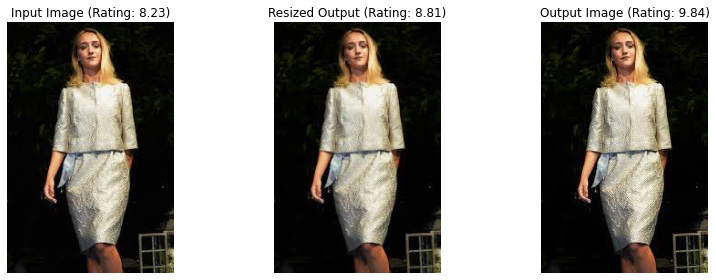

In [3]:
import cv2
import matplotlib.pyplot as plt

# Calculate the Laplacian quality score
laplacian_lr = 10 - (cv2.Laplacian(lr_image, cv2.CV_64F).var()/1000)
laplacian_sr = 10 - (cv2.Laplacian(sr_image_resized, cv2.CV_64F).var()/1000)
laplacian_hr = 10 - (cv2.Laplacian(sr_image, cv2.CV_64F).var()/1000)

# Normalize the pixel values to [0, 1]
lr_image_normalized = lr_image / 255.0
sr_image_resized_normalized = sr_image_resized /255.0
hr_image_normalized = sr_image / 255.0

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the input image with quality score
axes[0].imshow(lr_image_normalized)
axes[0].set_title(f'Input Image (Rating: {laplacian_lr:.2f})')
axes[0].axis('off')

# Display the resized output with quality score
axes[1].imshow(sr_image_resized_normalized)
axes[1].set_title(f'Resized Output (Rating: {laplacian_sr:.2f})')
axes[1].axis('off')

# Display the output image with quality score
axes[2].imshow(hr_image_normalized)
axes[2].set_title(f'Output Image (Rating: {laplacian_hr:.2f})')
axes[2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()